In [5]:
import matplotlib.pyplot as pt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np 
import pandas as pd
import os
import re
import shutil
import string

In [123]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
dataset_dir="C:\\Users\\personal\\Desktop\\Tensorflow\\ML basic with keras\\Basic text classification\\Multiple classifier\\Stackoverflow"

In [8]:
os.listdir(dataset_dir)

['test', 'train']

In [11]:
train_dir=os.path.join(dataset_dir,'train')
train_dir_python=os.path.join(train_dir,'python')
train_dir_java=os.path.join(train_dir,'java')
train_dir_javascript=os.path.join(train_dir,'javascript')
train_dir_csharp=os.path.join(train_dir,'csharp')
os.listdir(train_dir)

['csharp', 'java', 'javascript', 'python']

In [12]:
def samples(path,filename):
    sample_file=os.path.join(path,filename)
    with open(sample_file) as file:
        print(file.read())

In [18]:
filename=os.listdir(train_dir_python)[150]
samples(train_dir_python,filename)

"are there objects that cannot be coerced into a string in blank? in blank, can any object be coerced into a string unless its __str__ method is overloaded to raise an exception?"



In [19]:
filename=os.listdir(train_dir_java)[150]
samples(train_dir_java,filename)

"getting exception in thread ""main"" blank.lang.error: unresolved compilation: at filetest.main(filetest.blank:39) im getting exception in thread ""main"" blank.lang.error: unresolved compilation: at filetest.main(filetest.blank:39) line 39 is public static void main(string[] args){what am i doing wrong?..public class filetest{.    public static void main(string[] args){..        try{.            string infilename = args[0];.            string outfilename = args[1];.            bufferedreader ins= new bufferedreader(new filereader(infilename));.            bufferedreader con = new bufferedreader(new inputstreamreader(system.in));.            printwriter outs = new printwriter(new filewriter(outfilename));..            string first = ins.readline(); //read from file.            while(first != null){.                system.out.print(""type in a word to follow "" + first + "":"");.                string second = con.readline(); //read from console.                //append and write .    

In [20]:
filename=os.listdir(train_dir_javascript)[150]
samples(train_dir_javascript,filename)

"alf.nu random4 excercise, what is the answer? i was playing on this site, and i got stuck at the random4 problem...so, basically, the problem is the following...var random4 = new function() {.  var rand = math.random();..  this.test = function(x) {.    return rand === x;.  }.};...what value of x should be passed to random4.test in order to have it return true?..note that the code here is slightly different from the linked page. this is because we do not have access to the rand variable and i want to make this explicitly clear."



In [21]:
filename=os.listdir(train_dir_csharp)[150]
samples(train_dir_csharp,filename)

"convenient way for conditional logging logging is taking resources. especially to create log messages..to save runtime resources i do this:..if (logfile!=null) log(logfile, ""some message ""+somemethod());...it eliminates calling somemethod when logging is not required...is there more convenient way to code it? like..logger.logger?.log(""some message ""+somemethod());...logger is static class and logger is delegate... unfortunately it doesn't work in my vs2012...update: main purpose of this question is how to simplify code look and feel and reduce runtime spending. in my original approach method somemethod() is not called if logging is not necessary, but code stays the same. checking for null is only suggested approach to avoid calling extra methods...update2: some example:..    public class example {      .        public class logger .            {.                public static void log(string message).                {.                    console.writeline(message);.                

In [99]:
batch_size=32
seed=42
raw_training_dataset=tf.keras.preprocessing.text_dataset_from_directory('Stackoverflow/train',
                                                                       batch_size=batch_size,
                                                                       validation_split=0.2,
                                                                       subset='training',
                                                                       seed=seed)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [100]:
for text_batch,label_batch in raw_training_dataset.take(1):
    for i in range(5):
        print(f"label is {label_batch.numpy()[i]}")
        print(f"review is {text_batch.numpy()[i]}")
        print("=================================>")

label is 1
review is b'"my tester is going to the wrong constructor i am new to programming so if i ask a question that can be easily fixed, please forgive me. my program has a tester class with a main. when i send that to my regularpolygon class, it sends it to the wrong constructor. i have two constructors. 1 without perameters..public regularpolygon().    {.       mynumsides = 5;.       mysidelength = 30;.    }//end default constructor...and my second, with perameters. ..public regularpolygon(int numsides, double sidelength).    {.        mynumsides = numsides;.        mysidelength = sidelength;.    }// end constructor...in my tester class i have these two lines:..regularpolygon shape = new regularpolygon(numsides, sidelength);.        shape.menu();...numsides and sidelength were declared and initialized earlier in the testing class...so what i want to happen, is the tester class sends numsides and sidelength to the second constructor and use it in that class. but it only uses the d

In [101]:
print("Label 0 corresponds to ",raw_training_dataset.class_names[0])
print("Label 1 corresponds to ",raw_training_dataset.class_names[1])
print("Label 2 corresponds to ",raw_training_dataset.class_names[2])
print("Label 3 corresponds to ",raw_training_dataset.class_names[3])

Label 0 corresponds to  csharp
Label 1 corresponds to  java
Label 2 corresponds to  javascript
Label 3 corresponds to  python


In [102]:
raw_validation_dataset=tf.keras.preprocessing.text_dataset_from_directory('Stackoverflow/train',
                                                                       batch_size=batch_size,
                                                                       validation_split=0.2,
                                                                       subset='validation',
                                                                       seed=seed)

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


In [103]:
raw_test_dataset=tf.keras.preprocessing.text_dataset_from_directory('Stackoverflow/test',
                                                                       batch_size=batch_size)

Found 8000 files belonging to 4 classes.


Prepare the dataset for training
Next, you will standardize, tokenize, and vectorize the data using the helpful preprocessing.TextVectorization layer.

Standardization refers to preprocessing the text, typically to remove punctuation or HTML elements to simplify the dataset. Tokenization refers to splitting strings into tokens (for example, splitting a sentence into individual words, by splitting on whitespace). Vectorization refers to converting tokens into numbers so they can be fed into a neural network. All of these tasks can be accomplished with this layer.

As you saw above, the reviews contain various HTML tags like <br />. These tags will not be removed by the default standardizer in the TextVectorization layer (which converts text to lowecase and strips punctuation by default, but doesn't strip HTML). You will write a custom standardization function to remove the HTML.

In [104]:
def custom_standardization(input_data):
    lowercase=tf.strings.lower(input_data)
    stripped_html=tf.strings.regex_replace(lowercase,'<br />',' ')
    return tf.strings.regex_replace(stripped_html,
                                   '[%s]' % re.escape(string.punctuation),
                                   '')

In [105]:
max_features=10000
sequence_length=250

vectorize_layer=TextVectorization(standardize=custom_standardization,
                                 max_tokens=max_features,
                                 output_mode='int',
                                 output_sequence_length=sequence_length)

In [106]:
train_text=raw_training_dataset.map(lambda x,y:x)
vectorize_layer.adapt(train_text)

In [107]:
def vectorize_text(text,label):
    text=tf.expand_dims(text,-1)
    return vectorize_layer(text),label

In [108]:
text_batch,label_batch=next(iter(raw_training_dataset))
first_review,first_label=text_batch[0],label_batch[0]
print("Review",first_review)
print("Label",raw_training_dataset.class_names[first_label])
print("vectorize review")
print(vectorize_text(first_review,first_label))

Review tf.Tensor(b'"unit testing of setters and getters teacher wanted us to do a comprehensive unit test. for me, this will be the first time that i use junit. i am confused about testing set and get methods. do you think should i test them? if the answer is yes; is this code enough for testing?..  public void testsetandget(){.    int a = 10;.    class firstclass = new class();.    firstclass.setvalue(10);.    int value = firstclass.getvalue();.    assert.asserttrue(""error"", value==a);.  }...in my code, i think if there is an error, we can\'t know that the error is deriving because of setter or getter."\n', shape=(), dtype=string)
Label java
vectorize review
(<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[1011,  773,    9, 2456,    8, 1863, 2362,  690, 1267,    4,   40,
           5,    1, 1011,  196,   12,   74,   13,   72,   33,    2,   98,
         105,   14,    3,   70, 9611,    3,   34,  888,  202,  773,  107,
           8,   41,  242,   40,   58,  291,   90,    3,  19

In [109]:
print("10---->",vectorize_layer.get_vocabulary()[10])
print("100---->",vectorize_layer.get_vocabulary()[100])
print("1000---->",vectorize_layer.get_vocabulary()[1000])
print("Vocabular size -->",len(vectorize_layer.get_vocabulary()))

10----> if
100----> into
1000----> systemoutprintlnplease
Vocabular size --> 10000


In [110]:
train_dataset=raw_training_dataset.map(vectorize_text)
test_dataset=raw_test_dataset.map(vectorize_text)
valisation_dataset=raw_validation_dataset.map(vectorize_text)

Configure the dataset for performance
These are two important methods you should use when loading data to make sure that I/O does not become blocking.

.cache() keeps data in memory after it's loaded off disk. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache, which is more efficient to read than many small files.

.prefetch() overlaps data preprocessing and model execution while training.

In [111]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
train_dataset=train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset=test_dataset.cache().prefetch(buffer_size=AUTOTUNE)
valisation_dataset=valisation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [112]:
embedding_dim = 16

In [125]:
model=tf.keras.Sequential([
    layers.Embedding(max_features+1,embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(4)
])

In [126]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
dropout_12 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_6 ( (None, 16)                0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 68        
Total params: 160,084
Trainable params: 160,084
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [128]:
early_stopping=EarlyStopping(monitor="val_loss",mode="min",patience=10,verbose=1)

In [129]:
epochs=100
model.fit(train_dataset,
          validation_data=valisation_dataset,
          epochs=epochs,
          callbacks=[early_stopping])

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 1.3787 - accuracy: 0.3583 - val_loss: 1.3678 - val_accuracy: 0.5206
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 1.3502 - accuracy: 0.4722 - val_loss: 1.3298 - val_accuracy: 0.5331
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 1.3010 - accuracy: 0.5475 - val_loss: 1.2717 - val_accuracy: 0.5850
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 1.2327 - accuracy: 0.5967 - val_loss: 1.2023 - val_accuracy: 0.6288
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 1.1589 - accuracy: 0.6323 - val_loss: 1.1302 - val_accuracy: 0.6562
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 1.0862 - accuracy: 0.6778 - val_loss: 1.0605 - val_accuracy: 0.6975
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 1.0160 - accuracy: 0.7141 - val_loss: 0.9977 - val_accuracy: 0.7219

Epoch 58/100
200/200 [==============================] - 1s 4ms/step - loss: 0.1679 - accuracy: 0.9639 - val_loss: 0.4765 - val_accuracy: 0.8350
Epoch 00058: early stopping


In [130]:
loss=pd.DataFrame(model.history.history)
loss.tail()

,loss,accuracy,val_loss,val_accuracy
53,0.187711,0.956563,0.470826,0.832500
54,0.183314,0.958594,0.471727,0.835000
55,0.175077,0.961563,0.472637,0.836875
56,0.171933,0.961875,0.473833,0.835625
57,0.167871,0.963906,0.476514,0.835000


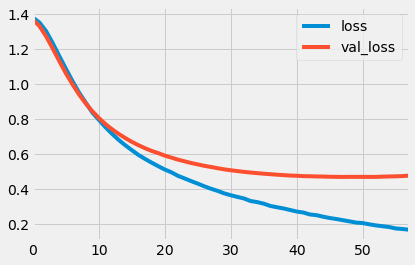

In [131]:
loss[["loss","val_loss"]].plot()

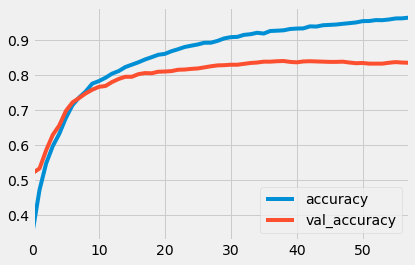

In [132]:
loss[["accuracy","val_accuracy"]].plot()

In [133]:
export_model=tf.keras.Sequential([
    vectorize_layer,
    model,
    layers.Activation('softmax')])

In [134]:
export_model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True),
                    optimizer='adam',metrics=['accuracy'])

In [135]:
loss,accuracy=export_model.evaluate(raw_test_dataset)
print(accuracy)

250/250 [==============================] - 5s 19ms/step - loss: 0.9674 - accuracy: 0.8006
0.8006250262260437


In [136]:
#y_pred=export_model.predict_classes(raw_test_dataset)
y_pred=np.argmax(export_model.predict(raw_test_dataset),axis=-1)

In [137]:
y_pred

array([3, 1, 3, ..., 3, 3, 2], dtype=int64)